In [0]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats

#specify parameters
aa=-1000 #lower edge of detector
bb=1000 #upper edge of detector
cc=0.1 #width of the detection cell
#null_activate: if you want to exclude every 1% of the measurements from chi2 calculation, choose False, else True
#daugher_particles: 1/3/4 daughter particles that you do the exercise with

def chi_square(repetitions, null_activate, statistics, daughter_particles): 
  chi=[] #define list for chi-square
  #in case you are tracking 3/4 daughter particles
  chi2=[]
  chi3=[]
  chi4=[]

  print("Simulation run for: ", repetitions, " particle(s).")

  #define detection cells of the detector
  detectorX=np.arange(aa,bb,cc) #list for x axis of detector
  detectorY=np.arange(aa,bb,cc) #list for y axis of detector

  for p in range(daughter_particles):
    for k in range(repetitions): #for every particle we track (one at the time):
      # Data for a three-dimensional line (3D location of a particle)
      zline = np.linspace(0, 10, 80) #create z axis
      xline=zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
      yline=zline*np.tan(random.randint(0,90))

      #get 3D location of a particle for only 8 detection points
      number=int(len(zline)/8.5) #to get 8 detection points, excludig 0 start (which we will later substract)
      XdetPoints=xline[::number]
      YdetPoints=yline[::number]
      ZdetPoints=zline[::number]

      #make arrays into lists so you can use list tools (like .pop()/.remove()...)
      ZdetPoints=list(ZdetPoints)
      YdetPoints=list(YdetPoints)
      XdetPoints=list(XdetPoints)

      XdetPoints.remove(XdetPoints[0])
      YdetPoints.pop(0)
      ZdetPoints.pop(0)

      if repetitions==1:
        print("")
        print("Actual points where the particle ended:")
        print("z points",ZdetPoints)
        print("y points:",YdetPoints)
        print("x points:",XdetPoints)
      if repetitions!=1:
        pass

      #detected points lists (error of non-infinetelisimal detection cells)
      x_cell_size_error_incl=[]
      y_cell_size_error_incl=[]


      """which cells detect the particle:"""
      m=0
      for m in range(len(XdetPoints)): #for every element in x values for detected particles
        j=0
        for j in range(len(detectorX)): #for every possible detection cell
          if j<(len(detectorX)-1): #except for the last detection cell (out of range error)
            if detectorX[j]<=XdetPoints[m]<detectorX[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cell
              x_cell_size_error_incl.append((detectorX[j]+detectorX[j+1])/2) #set this detector cell as the cell that detected the particle
      else:
        pass

      m=0
      for m in range(len(YdetPoints)): #for every element in y values for detected particles
        j=0
        for j in range(len(detectorY)): #for every point in the detection cells
          if j<(len(detectorY)-1): #except for the last detection cell
            if detectorY[j]<=YdetPoints[m]<detectorY[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cells
              y_cell_size_error_incl.append((detectorY[j]+detectorY[j+1])/2)
      else:
        pass

      if repetitions==1:
        print("")
        print("Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:")
        print("x cells: ", x_cell_size_error_incl)
        print("y cells: ", y_cell_size_error_incl)
      if repetitions!=1:
        pass

      """
      add a small probability (10% maybe) that it is found in an
      adjacent pixel (there are 8 adjacent pixels) – pick one randomly. Record that as the
      coordinate and then move to the next detector layer.
      """

      #only consider cases where a particle lands on every detector (if it happens for instance to have the initial angle of 89 degrees or so wrt z axis, then it will not hit the detector)
      if len(y_cell_size_error_incl)==len(x_cell_size_error_incl)==8: 

        #each elemenet of detected x,y values gets a random number 0-1
        probX=[]
        for m in x_cell_size_error_incl:
          probX.append(random.random())
        #print(probX) 
        probY=[]
        for m in y_cell_size_error_incl:
          probY.append(random.random())
        #print(probY) 

        #lists of final detected locations of each particle (incl prob that it is found in an adjacent pixel)
        x_measured=[]
        y_measured=[]

        #probability that it is detected in the detected pixel, prob that it is detected in any 8 of the adjacent pixels...
        i=0
        for i in range(len(probX)):
          if 0<=probX[i]<0.0375:
            x_measured.append(x_cell_size_error_incl[i]-cc)
          if 0.0375<=probX[i]<0.075:
            x_measured.append(x_cell_size_error_incl[i]+cc)
          if 0.075<=probX[i]:
            x_measured.append(x_cell_size_error_incl[i])

        i=0
        for i in range(len(probY)):
          if 0<=probY[i]<0.0375:
            y_measured.append(y_cell_size_error_incl[i]-0.25)
          if 0.0375<=probY[i]<0.075:
            y_measured.append(y_cell_size_error_incl[i]+0.25)
          if 0.075<=probY[i]:
            y_measured.append(y_cell_size_error_incl[i])
        

        

        if repetitions==1:
          plt.plot(y_measured, x_measured, "red", label="detection")#make graph of actual particle
          print("")
          print("measured x (probs incl): ", x_measured)
          print("measured y (probs incl): ", y_measured)
        if repetitions!=1:
          pass

        """
        Use the information from the slides linked to calculate the 𝜒
        2 value for your track fit
        compared to your data. We expect this to not be perfect – we added some
        imperfection in there. If the imperfection is not good enough, you can increase the
        probabilities discussed.
        """
        sigma=[cc**2]*len(y_measured)
        #print("sigma list: ", sigma)


        Alist=[]
        Blist=[]
        Clist=[]
        Dlist=[]
        Elist=[]
        Flist=[]

        for i in range(len(sigma)):
          Alist.append(y_measured[i]/sigma[i])
          Blist.append(1/sigma[i])
          Clist.append(x_measured[i]/sigma[i])
          Dlist.append((y_measured[i]**2)/sigma[i])
          Elist.append((x_measured[i]*y_measured[i])/sigma[i])
          Flist.append((x_measured[i]**2)/sigma[i])
        A=sum(Alist)
        B=sum(Blist)
        C=sum(Clist)
        D=sum(Dlist)
        E=sum(Elist)
        F=sum(Flist)
        #print(A, B, C, D, E, F)

        a=(E*B-C*A)/(D*B-A*A)
        b=(D*C-E*A)/(B*D-A*A)

        if repetitions==1:
          print("")
          print("Prediction: x=", round(a,4),"*y + ", round(b,4))
          print("")
        if repetitions!=1:
          pass

        #predicted x values based on the formula deduced from datapoints
        linear_fit=[]

        for i in range(len(y_measured)):
          #print(y_measured[i])
          linear_fit.append(a*y_measured[i]+b)
        #print(linear_fit)

        #finally find chi
        ChiList=[]
        for i in range(len(sigma)):
          h=(x_measured[i]-a*y_measured[i]-b)**2/sigma[i]
          ChiList.append(h)

        if p==0:
          chi.append(sum(ChiList))
        if daughter_particles==3 or daughter_particles==4:
          if p==1:
            chi2.append(sum(ChiList))
          if p==2:
            chi3.append(sum(ChiList))
        if daughter_particles==4:
          if p==3:
            chi4.append(sum(ChiList))

    #you've gathered all repetitions for a certain daughter particle
    chi = [x for x in chi if str(x) != 'nan'] #remove infinities
    if daughter_particles==3 or daughter_particles==4:
       chi2 = [x for x in chi2 if str(x) != 'nan']
       chi3 = [x for x in chi3 if str(x) != 'nan']
    if daughter_particles==4:
       chi4 = [x for x in chi4 if str(x) != 'nan']

  #you've gathered info for all daughters and all repetitions
  #plotting graphs
  if repetitions==1:
    plt.plot(y_measured, linear_fit, "blue", label="prediction") #make graph
    plt.legend(loc="lower right")
    plt.title("Detection vs Prediction")
  if repetitions!=1:
    plt.hist(chi, color="blue", label="daughter 1")
    if daughter_particles==3 or daughter_particles==4:
      plt.hist(chi2, color="green", label="daughter 2")
      plt.hist(chi3, color="purple", label="daughter 3")
    if daughter_particles==4:
      plt.hist(chi, color="gold", label="daughter 4")
    plt.title("full histogram")
    plt.legend(loc="upper right")

  #leave out 1 percent
  if daughter_particles==1:
    if null_activate==True:
      probsnull=[]
      for i in range(len(ChiList)):
        probsnull.append(random.random())
      for i in range(len(probsnull)):
        if probsnull[i]<0.01:
          chi.remove(chi[i])

  #if len(y_cell_size_error_incl)!=len(x_cell_size_error_incl)!=8:
  #  pass

  print("Chi-square, daughter 1:", chi)
  if daughter_particles==3 or daughter_particles==4:
    print("Chi-square, daughter 2: ", chi2)
    print("Chi-square, daughter 3: ", chi3)
  if daughter_particles==4:
    print("Chi-square, daughter 4: ", chi4)

  if statistics==True:
    print("")
    print("Statistics for Daughter 1")
    print("mean: {}" .format(np.mean(chi)))
    print("variance: {}" .format(np.var(chi)))
    print("skewness: {}" .format(skew(chi)))
    print("kurtosis: {}" .format(kurtosis(chi)))
    if daughter_particles==3 or daughter_particles==4:
      print("")
      print("Statistics for Daughter 2")
      print("mean: {}" .format(np.mean(chi2)))
      print("variance: {}" .format(np.var(chi2)))
      print("skewness: {}" .format(skew(chi2)))
      print("kurtosis: {}" .format(kurtosis(chi2)))
      print("")
      print("Statistics for Daughter 3")
      print("mean: {}" .format(np.mean(chi3)))
      print("variance: {}" .format(np.var(chi3)))
      print("skewness: {}" .format(skew(chi3)))
      print("kurtosis: {}" .format(kurtosis(chi3)))
    if daughter_particles==4:
      print("")
      print("Statistics for Daughter 4")
      print("mean: {}" .format(np.mean(chi4)))
      print("variance: {}" .format(np.var(chi4)))
      print("skewness: {}" .format(skew(chi4)))
      print("kurtosis: {}" .format(kurtosis(chi4)))

Simulation run for:  10  particle(s).
Chi-square, daughter 1: [0.8218254868288921, 19.218852459026138, 2.9211458657641542, 0.02716184339861435, 261.1547256097688, 150.86672766089345, 1.9799305286991429, 7.438056769767153, 297.75000000013887, 0.5357142857145293]
Chi-square, daughter 2:  [2.7278055133498977, 1110.328058664699, 3.064732320503408e-27, 15.300858218759926, 4.147438853297944, 0.4967144327450603, 2.5274403470715807, 22293.36668499096, 0.7179487179490442, 0.9392076502733686]
Chi-square, daughter 3:  [1580.1504702200318, 3.216300387084021, 0.7872085686013073, 1.7493581724142115, 62.25500670592018, 7027.874586121166, 2.2434491855067504, 21619.07680432444, 0.47619047619069327, 38.82394894895011]
Chi-square, daughter 4:  [0.694468546638058, 11.852040816331929, 0.4681806003857207, 3.862943653499512, 174.98454139470712, 0.5639371239797906, 2.298749939200423, 2.8888949165808533e-31, 243.05509732763727, 0.5357142857145298]

Statistics for Daughter 1
mean: 74.27141405099998
variance: 12

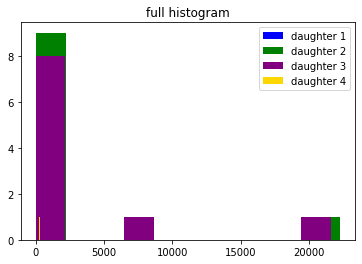

In [24]:
chi_square(10, False, True, 4)